In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [52]:
leads = pd.read_csv('Leads.csv')
leads.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Get updates on DM Content    Lead Profile    City  \
0                        No          Select  Select   
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   
3                        No          Select  Mumbai   
4                        No          Select  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 37 columns]

## 1. Data Understanding

In [53]:
leads.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

In [54]:
leads.shape

(9240, 37)

In [55]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [56]:
#TotalVisits should be converted to int
#leads['Page Views Per Visit'].value_counts() - looks weird - how can views be a decimal value


for i in leads.columns:
    print(i)
    print(leads[i].value_counts())
    print('_____________________________________')

Prospect ID
99d7e3bc-a765-4739-b7ca-cfd59c3d41ed    1
26fb91bd-732e-47fa-8c95-43dfc1539a25    1
31a9844b-ddd9-43b9-bc0d-fe00d3606b91    1
c5dd06bc-4117-4a1f-9eef-f2a1cfaa679e    1
8c43114d-8cc2-40a4-b8d0-b787c693e5a4    1
                                       ..
e77c6cb5-147a-4a04-b633-9ea56e6cd148    1
7e7b9833-4211-47e0-847e-972c002d70d3    1
417b38e7-9ed3-4213-b168-4188effb4458    1
3a638ceb-4ab0-4ba5-b843-d25047253f11    1
88597f9e-c6a2-451f-9c9f-f85c2125ffba    1
Name: Prospect ID, Length: 9240, dtype: int64
_____________________________________
Lead Number
608255    1
596233    1
656682    1
592824    1
652580    1
         ..
631489    1
600768    1
598556    1
616923    1
655360    1
Name: Lead Number, Length: 9240, dtype: int64
_____________________________________
Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
__________

### This is for analysis/removal of columns - single value or high concentration on one value or redundant/irrelevant columns

Update me on Supply Chain Content
No    9240
Name: Update me on Supply Chain Content, dtype: int64
_____________________________________
Get updates on DM Content
No    9240
Name: Get updates on DM Content, dtype: int64
_____________________________________
I agree to pay the amount through cheque
No    9240
Name: I agree to pay the amount through cheque, dtype: int64
_____________________________________
Search
No     9226
Yes      14
Name: Search, dtype: int64
_____________________________________
Magazine
No    9240
Name: Magazine, dtype: int64
_____________________________________
Newspaper Article
No     9238
Yes       2
Name: Newspaper Article, dtype: int64
_____________________________________
X Education Forums
No     9239
Yes       1
Name: X Education Forums, dtype: int64
_____________________________________
Newspaper
No     9239
Yes       1
Name: Newspaper, dtype: int64
_____________________________________
Digital Advertisement
No     9236
Yes       4
Name: Digital Advertisement, dtype: int64
_____________________________________
Through Recommendations
No     9233
Yes       7
Name: Through Recommendations, dtype: int64
_____________________________________
Receive More Updates About Our Courses
No    9240
Name: Receive More Updates About Our Courses, dtype: int64
_____________________________________
What matters most to you in choosing a course
Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64
_____________________________________
Do Not Call
No     9238
Yes       2
Name: Do Not Call, dtype: int64



In [57]:
del_col = (['Newspaper','Receive More Updates About Our Courses',
            'Update me on Supply Chain Content','Newspaper Article',
            'I agree to pay the amount through cheque','Newspaper Article',
           'Magazine','Get updates on DM Content','X Education Forums','Do Not Call'])

leads.drop(del_col, axis = 1, inplace = True)

In [58]:
#removing Id columns as not relevant to our analysis
leads.drop(['Prospect ID','Lead Number'], axis = 1, inplace = True)

In [59]:
leads.shape

(9240, 26)

### Null Value Treatment

In [60]:
#We can observe null values on many columns. 
#We can drop the unwanted columns then proceed to treat the null values.

In [61]:
ln = leads.isnull().sum() * 100/len(leads)
ln[ln > 0]

Lead Source                                       0.389610
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Tags                                             36.287879
Lead Quality                                     51.590909
Lead Profile                                     29.318182
City                                             15.367965
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Index                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Score                       45.6493

In [62]:
#dropping columns with high percentage of nulls > 35%
del_col = (['Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score',
            'Asymmetrique Profile Score','Lead Quality','Tags'])               
leads.drop(del_col, axis = 1, inplace = True)

In [63]:
#treating nulls
#Substitue generic value for null
leads['Lead Source'].value_counts()
leads['Lead Source'].fillna("Other", inplace = True) 
leads['Lead Source'].isnull().sum()

0

In [64]:
#least number of total visits possible is 0
leads['TotalVisits'].value_counts()
leads['TotalVisits'].fillna(0, inplace = True) 
leads['TotalVisits'].isnull().sum()

0

In [65]:
#Replacing with minimum value possible - 0
leads['Page Views Per Visit'].value_counts()
leads['Page Views Per Visit'].fillna(0, inplace = True) 
leads['Page Views Per Visit'].isnull().sum()

0

In [66]:
leads['Last Activity'].value_counts()
leads['Last Activity'].fillna("Other", inplace = True) 
leads['Last Activity'].isnull().sum()

0

In [67]:
#
leads['Country'].value_counts()
leads['Country'].fillna("unknown", inplace = True) 
leads['Country'].isnull().sum()

0

In [88]:
#Select seems to be the default value when a specialization is not selected
select_default_value = ['Specialization','How did you hear about X Education','Lead Profile','City',
                        'What is your current occupation']
for i in select_default_value:
    leads[i].fillna("Select", inplace = True) 

In [87]:
#filling null with Better Career Prospects as this is the most common option
leads['What matters most to you in choosing a course'].value_counts()
leads['What matters most to you in choosing a course'].fillna("Better Career Prospects", inplace = True) 
leads['What matters most to you in choosing a course'].isnull().sum()

0

In [89]:
leads.isnull().sum() * 100/len(leads)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
How did you hear about X Education               0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Digital Advertisement                            0.0
Through Recommendations                          0.0
Lead Profile                                     0.0
City                                             0.0
A free copy of Mastering The Interview        

### Outliers

In [69]:
lead_n = leads.select_dtypes(include=np.number)
num_col = lead_n.columns
num_col

lead_c = leads.select_dtypes(include=np.object)
cat_col = lead_c.columns
(num_col,cat_col)

(Index(['Converted', 'TotalVisits', 'Total Time Spent on Website',
        'Page Views Per Visit'],
       dtype='object'),
 Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
        'Country', 'Specialization', 'How did you hear about X Education',
        'What is your current occupation',
        'What matters most to you in choosing a course', 'Search',
        'Digital Advertisement', 'Through Recommendations', 'Lead Profile',
        'City', 'A free copy of Mastering The Interview',
        'Last Notable Activity'],
       dtype='object'))

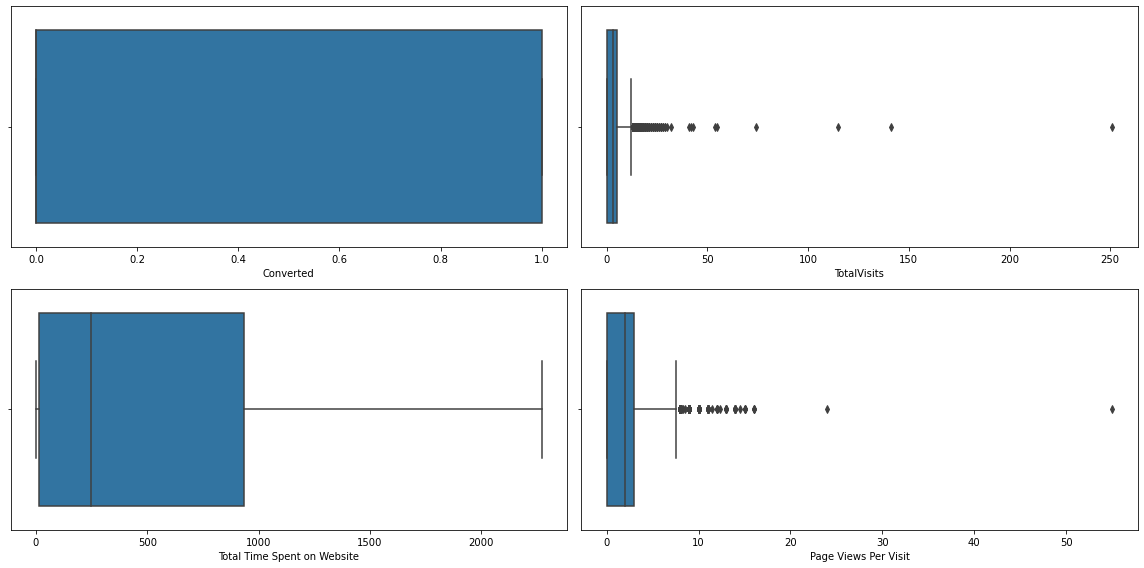

In [70]:
# for i in leads.columns:
plt.figure(figsize = (16,8))
subplot = 221
for i in leads[num_col]:
    plt.subplot(subplot)
    sns.boxplot(leads[i])
    subplot +=1
plt.tight_layout()

In [75]:
#Outlier treatment
#We can observe outliers in TotalVisits and PageView columns

### Dummy variable creation

In [95]:
# Converting some binary variables (Yes/No) to 0/1

leads_computed = leads

# List of variables to map
varlist =  ['Do Not Email', 'Search','A free copy of Mastering The Interview',
            'Digital Advertisement','Through Recommendations']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the leads list
leads_computed[varlist] = leads_computed[varlist].apply(binary_map)

In [96]:
leads_computed.head()

Lead Origin     Lead Source  Do Not Email  Converted  \
0                      API      Olark Chat           NaN          0   
1                      API  Organic Search           NaN          0   
2  Landing Page Submission  Direct Traffic           NaN          1   
3  Landing Page Submission  Direct Traffic           NaN          0   
4  Landing Page Submission          Google           NaN          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity  Country           Specialization  \
0  Page Visited on Website  unknown                   Select   
1             Email Opened    India                   Select   
2             Email Opened    India  Business Administration   
3              Unreachable    India    Media and Advertising   
4        Converted to Lead    India                   Select   

  How did you hear about X Education What is your current occupation  \
0                             Select                      Unemployed   
1                             Select                      Unemployed   
2                             Select                         Student   
3                      Word Of Mouth                      Unemployed   
4                              Other                      Unemployed   

  What matters most to you in choosing a course  Search  \
0                       Better Career Prospects     NaN   
1                       Better Career Prospects     NaN   
2                       Better Career Prospects     NaN   
3                       Better Career Prospects     NaN   
4                       Better Career Prospects     NaN   

   Digital Advertisement  Through Recommendations    Lead Profile    City  \
0                      0                        0          Select  Select   
1                      0                        0          Select  Select   
2                      0                        0  Potential Lead  Mumbai   
3                      0                        0          Select  Mumbai   
4                      0                        0          Select  Mumbai   

   A free copy of Mastering The Interview Last Notable Activity  
0                                     NaN              Modified  
1                                     NaN          Email Opened  
2                                     NaN          Email Opened  
3                                     NaN              Modified  
4                                     NaN              Modified

## 2. EDA

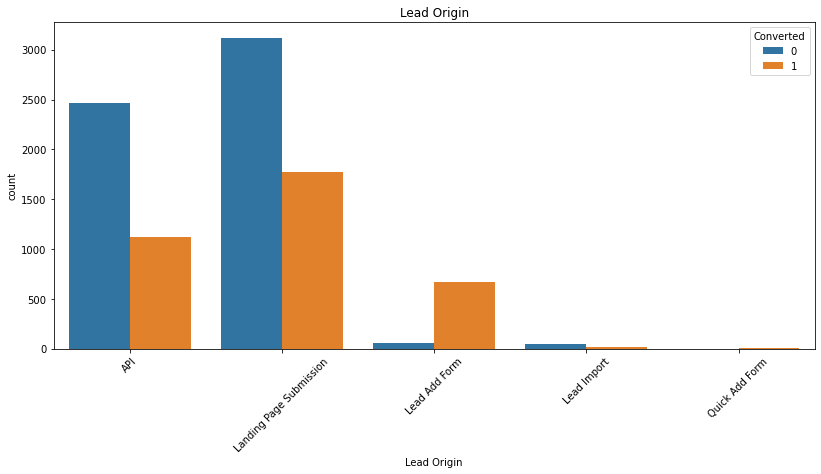

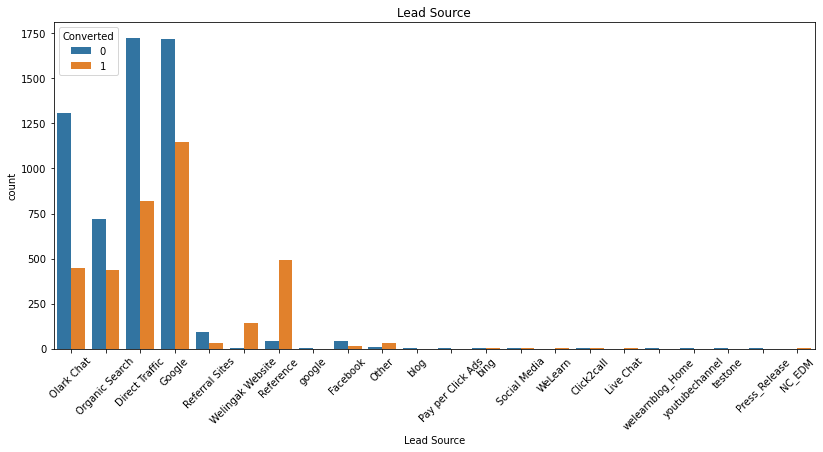

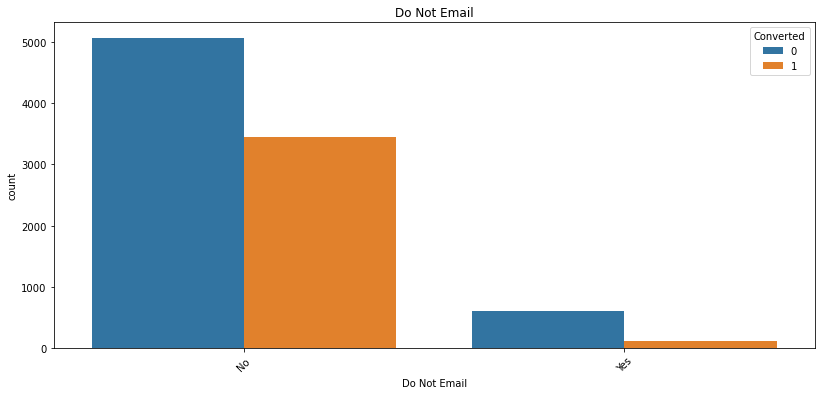

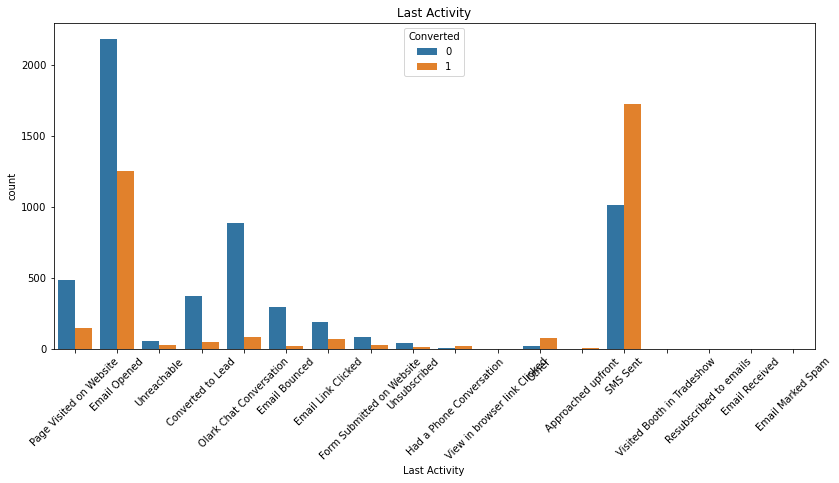

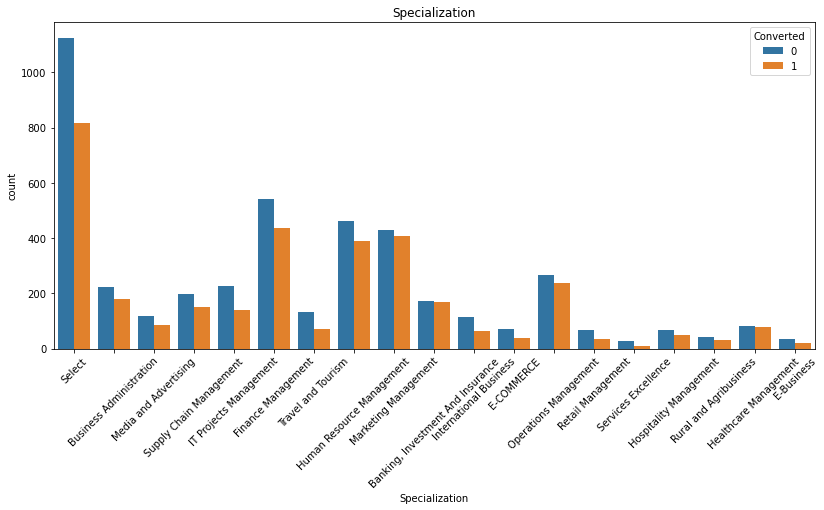

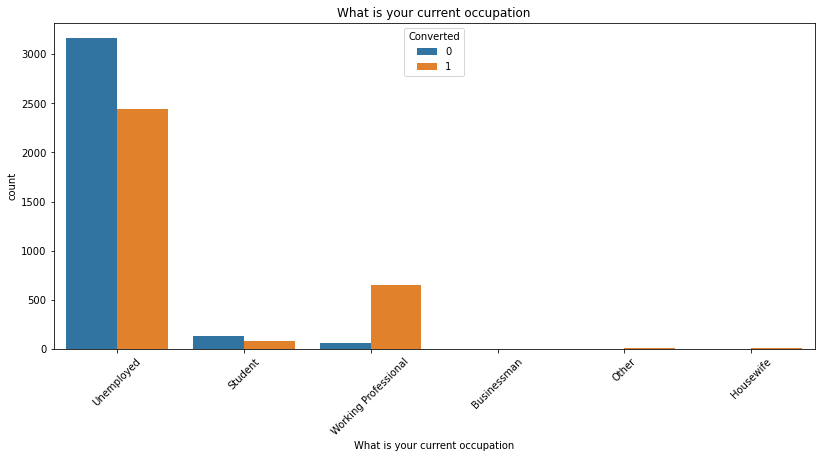

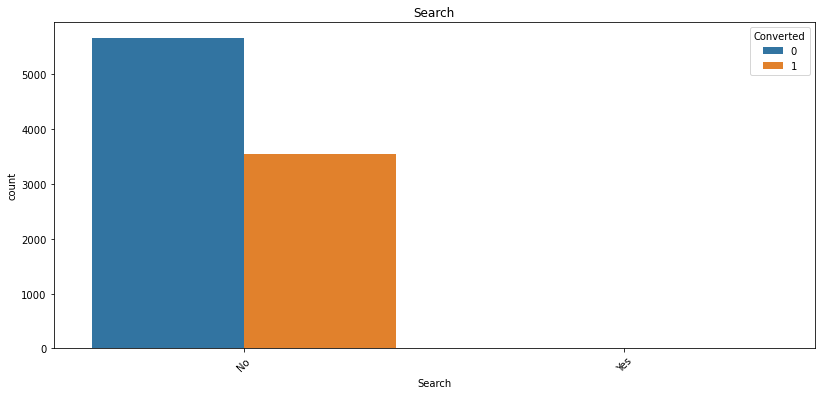

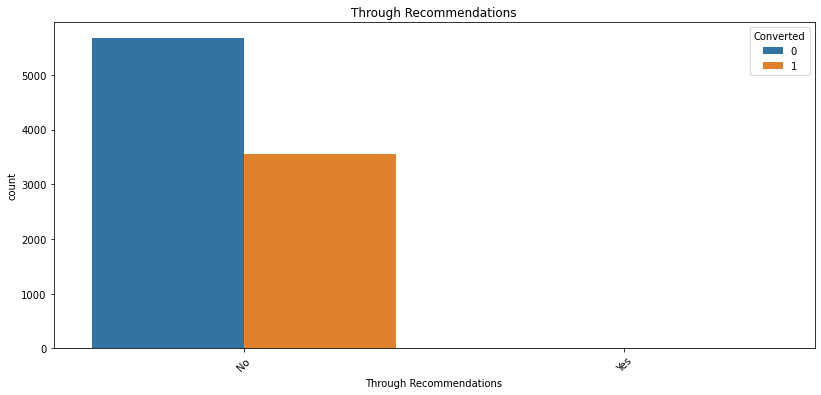

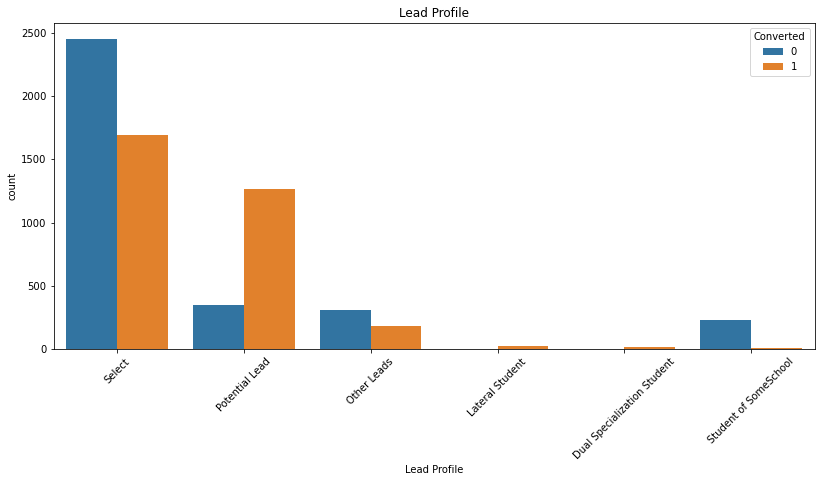

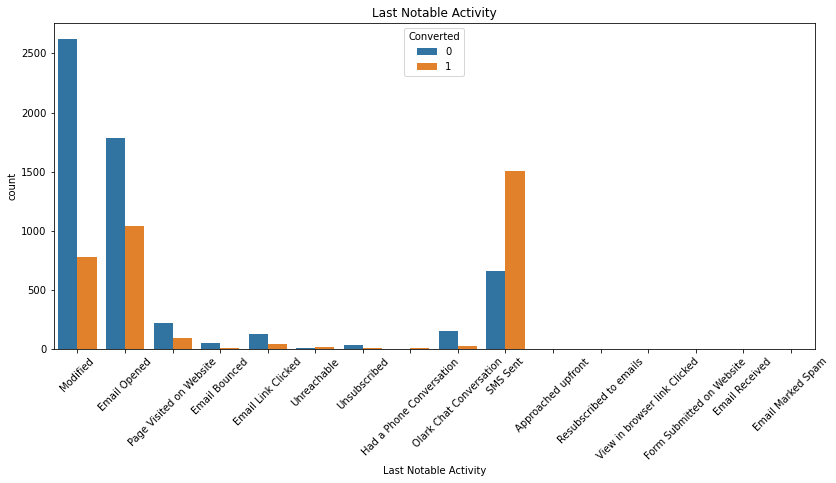

In [72]:
for column in cat_col:
    plt.figure(figsize=(30,6))
    plt.subplot(121)
    sns.countplot(x=leads[column],hue=leads['Converted'],data=leads)
    plt.title(column)    
    plt.xticks(rotation=45)

In [73]:
#Observations

In [90]:
#plotting heatmap to observe the relationship between the variables
plt.figure(figsize = (20,10))        
sns.heatmap(leads.corr(),annot = True)
plt.show()